In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
mcr = pd.read_csv('multipleChoiceResponses.csv')
ffr = pd.read_csv('freeFormResponses.csv')

C:\Users\dagar\Anaconda32\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dagar\Anaconda32\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data Treatment 
Programming language:
Python, Matlab, Rstudio and others.
Education
BD (Bachelor's degree), DD (Doctoral degree), NA (No answer), MD (Master's degree), HS (High School), PD (Professional degree), NB (Studies but not Bachelor's degree)

In [3]:
mcr.drop(mcr[mcr.Q1 == "Prefer not to say"].index)
ffr.drop(mcr[mcr.Q1 == "Prefer not to say"].index)
mcr = mcr[ffr.Q12_Part_4_TEXT.notnull()]
ffr = ffr[ffr.Q12_Part_4_TEXT.notnull()]
ffr = ffr[mcr.Q4.notnull()]
mcr = mcr[mcr.Q4.notnull()]
ffr = ffr[mcr.Q6.notnull()]
mcr = mcr[mcr.Q6.notnull()]

gender = np.array(mcr['Q1'][1:])
gender = np.where(gender == 'Prefer not to say', 'NA', gender )
gender = np.where(gender == 'Prefer to self-describe', 'NA', gender )

coding = np.array(ffr['Q12_Part_4_TEXT'][1:])
for i in range(len(coding)):
    if 'mat' in coding[i] or 'MAT' in coding[i] or 'Mat' in coding[i]:
        coding[i] = 'Matlab' 
    elif 'Rstudio' in coding[i] or 'R' in coding[i] or 'rstudio' in coding[i] or 'r studio' in coding[i]:
        coding[i] = 'RStudio'
    elif ('Jup' in coding[i] or 'anaconda' in coding[i] or 'Py' in coding[i] or 'py' in coding[i] or 
    'notebook' in coding[i] or 'jup' in coding[i] or 'spyder' in coding[i] or 'Spyder' in coding[i] or 
    'Anaconda' in coding[i] or 'pandas' in coding[i] or 'Pandas' in coding[i] or 'learn' in coding[i] or 
    'Learn' in coding[i] or 'Notebook' in coding[i] or 'PY' in coding[i] or 'Tensor' in coding[i] or 'tensor' in coding[i]):
        coding[i] = "Python"
    else:
        coding[i] = 'Other'

age = np.array(mcr['Q2'][1:])

education = np.array(mcr['Q4'][1:])
for i in range(len(education)):
    if(education[i] == 'Bachelor’s degree'):
        education[i] = 'BD'
    if(education[i] == 'Doctoral degree'):
        education[i] = 'DD'
    if(education[i] == 'I prefer not to answer'):
        education[i] = 'NA'
    if(education[i] == 'Master’s degree'):
        education[i] = 'MD'
    if(education[i] == 'No formal education past high school'):
        education[i] = 'HS'
    if(education[i] == 'Professional degree'):
        education[i] = 'PD'
    if(education[i] == 'Some college/university study without earning a bachelor’s degree'):
        education[i] = 'NB'

country = np.array(mcr['Q3'][1:])
for i in range(len(country)):
    if (country[i] == 'Argentina' or country[i] == 'Brazil' or country[i] == 'Chile' or country[i] == 'Colombia' or
       country[i] == 'Mexico' or country[i] == 'Peru'):
        country[i] = 'Latin America'
    if (country[i] == 'Canada' or country[i] == 'United States of America'):
        country[i] = 'North America'
    if (country[i] == 'Austria' or country[i] == 'Belarus' or country[i] == 'Belgium' or country[i] == 'Czech Republic' or
       country[i] == 'Denmark' or country[i] == 'Finland' or country[i] == 'France' or country[i] == 'Germany' or
       country[i] == 'Greece' or country[i] == 'Hungary' or country[i] == 'Ireland' or country[i] == 'Italy' or
        country[i] == 'Netherlands' or country[i] == 'Norway' or country[i] == 'Poland' or country[i] == 'Portugal' or
        country[i] == 'Romania' or country[i] == 'Spain' or country[i] == 'Sweden' or country[i] == 'Switzerland' or 
        country[i] == 'United Kingdom of Great Britain and Northern Ireland'):
        country[i] = 'Europe'
    if (country[i] == 'Egypt' or country[i] == 'Kenya' or country[i] == 'Morocco' or country[i] == 'Nigeria' or 
        country[i] == 'South Africa' or country[i] == 'Tunisia' ):
        country[i] = 'Africa'
    if (country[i] == 'Australia' or country[i] == 'New Zealand' or country[i] == ''):
        country[i] = 'Oceania'
    if (country[i] == 'Bangladesh' or country[i] == 'China' or country[i] == 'Hong Kong (S.A.R.)' or country[i] == 'India' 
       or country[i] == 'Indonesia' or country[i] == 'Iran, Islamic Republic of...' or country[i] == 'Israel' or 
        country[i] == 'Japan' or country[i] == 'Malaysia' or country[i] == 'Pakistan' or country[i] == 'Philippines' or 
        country[i] == 'Republic of Korea' or country[i] == 'Russia' or country[i] == 'Singapore' or 
        country[i] == 'South Korea' or country[i] == 'Thailand' or country[i] == 'Turkey' or country[i] == 'Ukraine' or 
        country[i] == 'Viet Nam'):
        country[i] = 'Asia'
    if (country[i] == 'I do not wish to disclose my location' or country[i] == 'Other'):
        country[i] = 'NA'

proff = np.array(mcr['Q6'][1:])
use = np.array(mcr[['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5','Q13_Part_6', 'Q13_Part_7', 'Q13_Part_8',
        'Q13_Part_9', 'Q13_Part_10','Q13_Part_11', 'Q13_Part_12', 'Q13_Part_13', 'Q13_Part_14','Q13_Part_15']][1:].notnull())
use = np.where(use == True,1,0)

In [4]:
def zeros_ones(data):
    n = len(data)
    cat = np.unique(data)
    m = len(cat)
    t = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if(data[i] == cat[j]):
                t[i][j] = 1
    return t

In [5]:
Y = proff
X = np.concatenate((zeros_ones(gender), zeros_ones(age), zeros_ones(coding),
                    zeros_ones(education), zeros_ones(country), use), axis=1)
for i in range(len(X[0])):
    X[:,i] = ( X[:,i] - np.mean(X[:,i]) )/np.std(X[:,i])

In [6]:
def graph(name, data):
    cat , freq = np.unique(data, return_counts=True)
    freq = freq / np.sum(freq) * 100
    x = np.arange(len(cat))
    plt.bar(x, freq)
    c = list(cat)
    plt.xticks(x,c)
    plt.ylabel("Relative frequency (%)")
    plt.xlabel(name)

def graph_h(name, data):
    cat , freq = np.unique(data, return_counts=True)
    freq = freq / np.sum(freq) * 100
    x = np.arange(len(cat))
    c = list(cat)
    plt.barh(x, freq, tick_label=c )
    plt.xlabel("Relative frequency (%)")
    plt.ylabel(name)

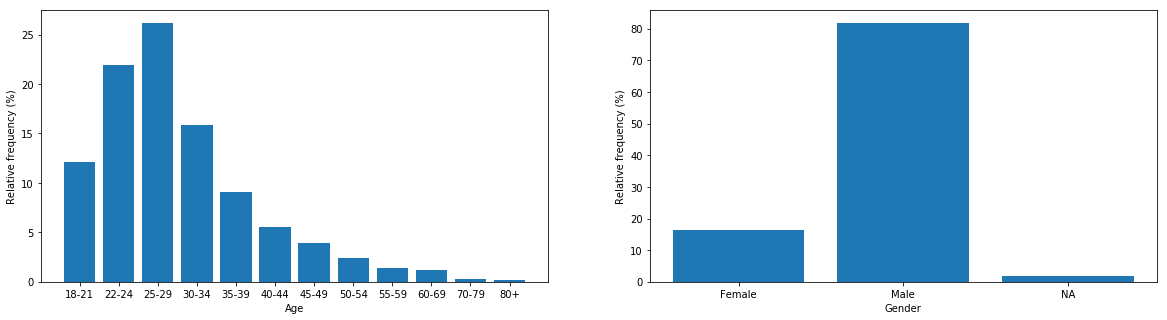

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
graph('Age', age)

plt.subplot(1,2,2)
graph('Gender', gender)

plt.show()

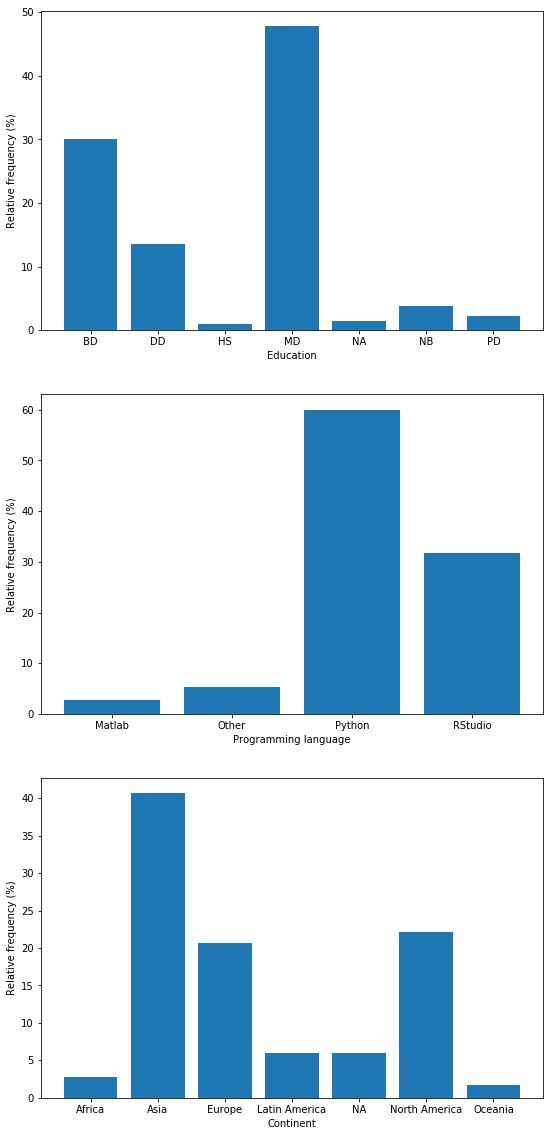

In [8]:
plt.figure(figsize=(9,20))

plt.subplot(3,1,1)
graph('Education', education)

plt.subplot(3,1,2)
graph('Programming language', coding)

plt.subplot(3,1,3)
graph('Continent', country)

plt.show()

In [9]:
def group_graph(colors, data):
    
    cat, freq = np.unique(colors, return_counts=True)
    n = len(cat)
    c_dat = np.unique(data)
    x = np.arange(len(c_dat))
    for i in range(n):
        c, f = np.unique(data[colors == cat[i]], return_counts=True)
        while(len(f) != len(x)):
            f = np.append(f,0)
        p = plt.bar(x, f, label= cat[i])
        
    c_dat = list(c_dat)
    plt.xticks(x,c_dat)
    plt.legend()

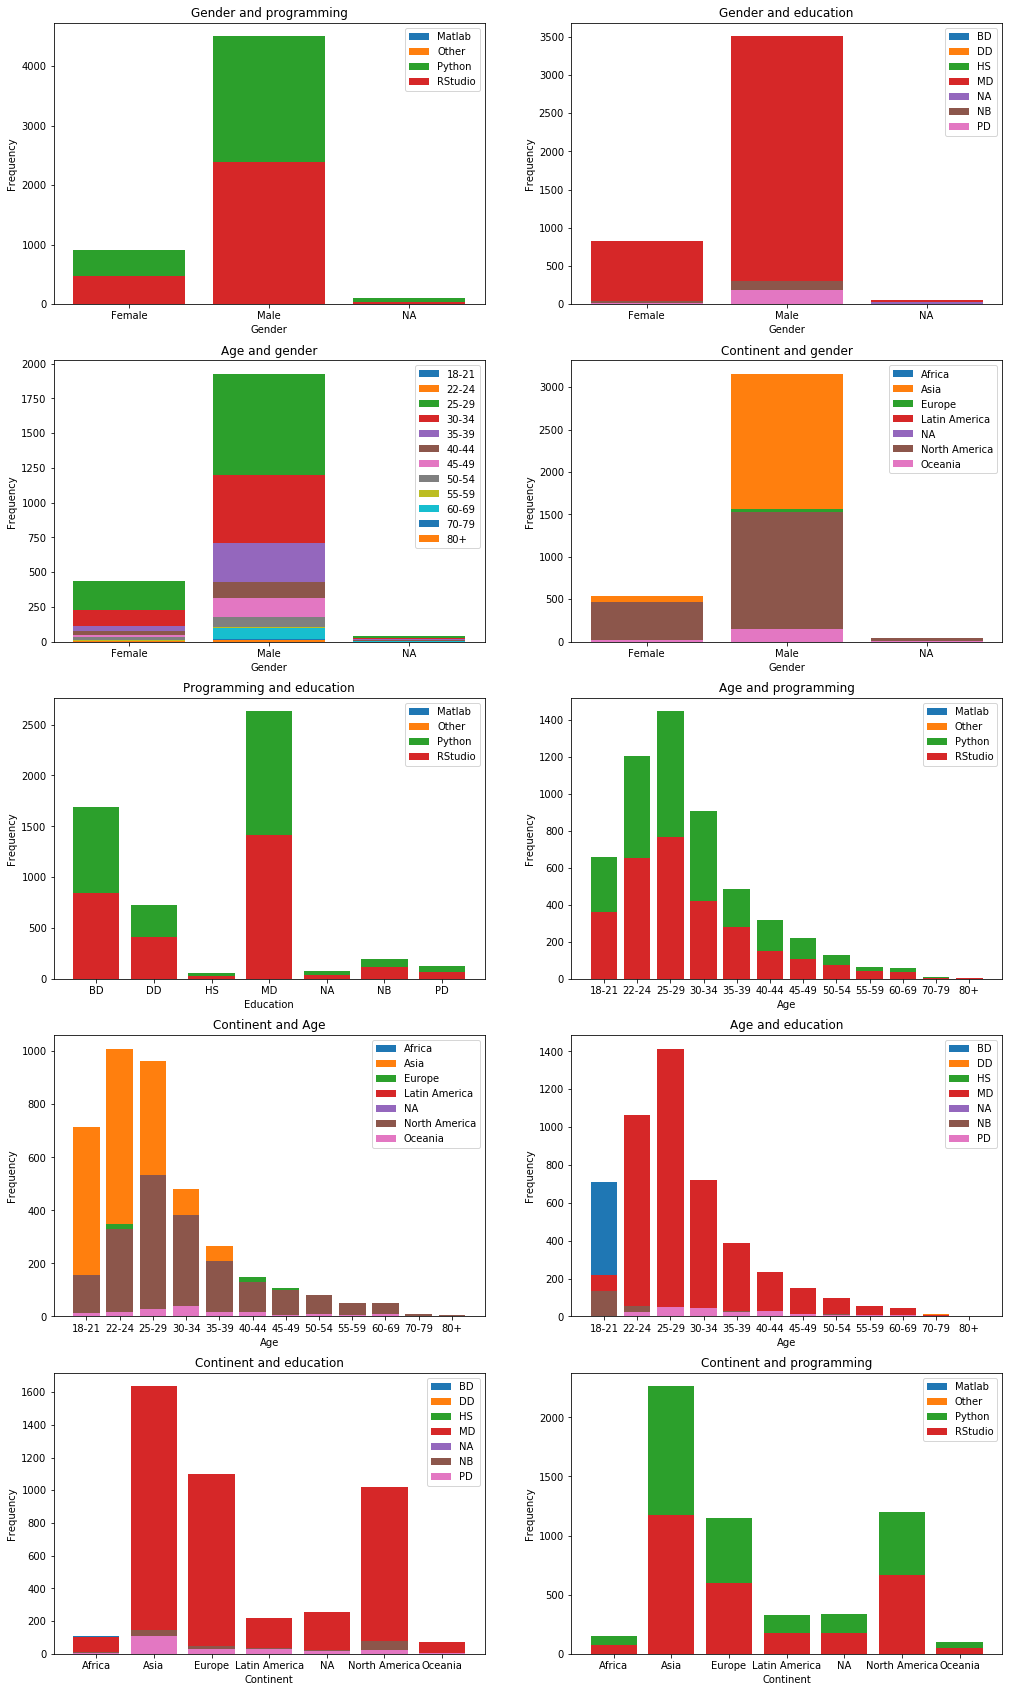

In [10]:
plt.figure(figsize=(17,30))

plt.subplot(5,2,1)
group_graph(coding, gender)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender and programming')

plt.subplot(5,2,2)
group_graph(education, gender)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender and education')

plt.subplot(5,2,6)
group_graph(coding, age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and programming')

plt.subplot(5,2,8)
group_graph(education, age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and education')

plt.subplot(5,2,5)
group_graph(coding, education)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Programming and education')

plt.subplot(5,2,3)
group_graph(age, gender)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Age and gender')

plt.subplot(5,2,10)
group_graph(coding, country)
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Continent and programming')

plt.subplot(5,2,9)
group_graph(education, country)
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Continent and education')

plt.subplot(5,2,7)
group_graph(country, age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Continent and Age')

plt.subplot(5,2,4)
group_graph(country, gender)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Continent and gender')

plt.show()

Within the graphs, we can observe that most of the Kaggle womans are from North America, have a Masters's degree and like to programm in languages like Python. On the other hand, most of the males are from Asia, have a lot of different education levels and like to programm in Python and RStudio. Also, it seems that the people with age between 25-29 like to programm in Python but older and younger people prefer Rstudio. Furthermore, the younger people have a Bacheleor's degree and the older one have a master's degree. In addition, the younger people are from asia and the older one are from North America. The levels of education seems to be independent on the continent of origin with a special fact that almost a 5% of Kagglers from Asia have Professional degree. Moreover, the most likely age for the Kagglers is between 25-29, the Kagglers are men, and ther are from Asia, they like to programm in Python and have a Master's degree.

Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
X_tr , X_ts, Y_tr, Y_ts = train_test_split(X,Y, test_size=0.5) 

In [13]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_tr,Y_tr)
ERF = RF.score(X_ts,Y_ts)

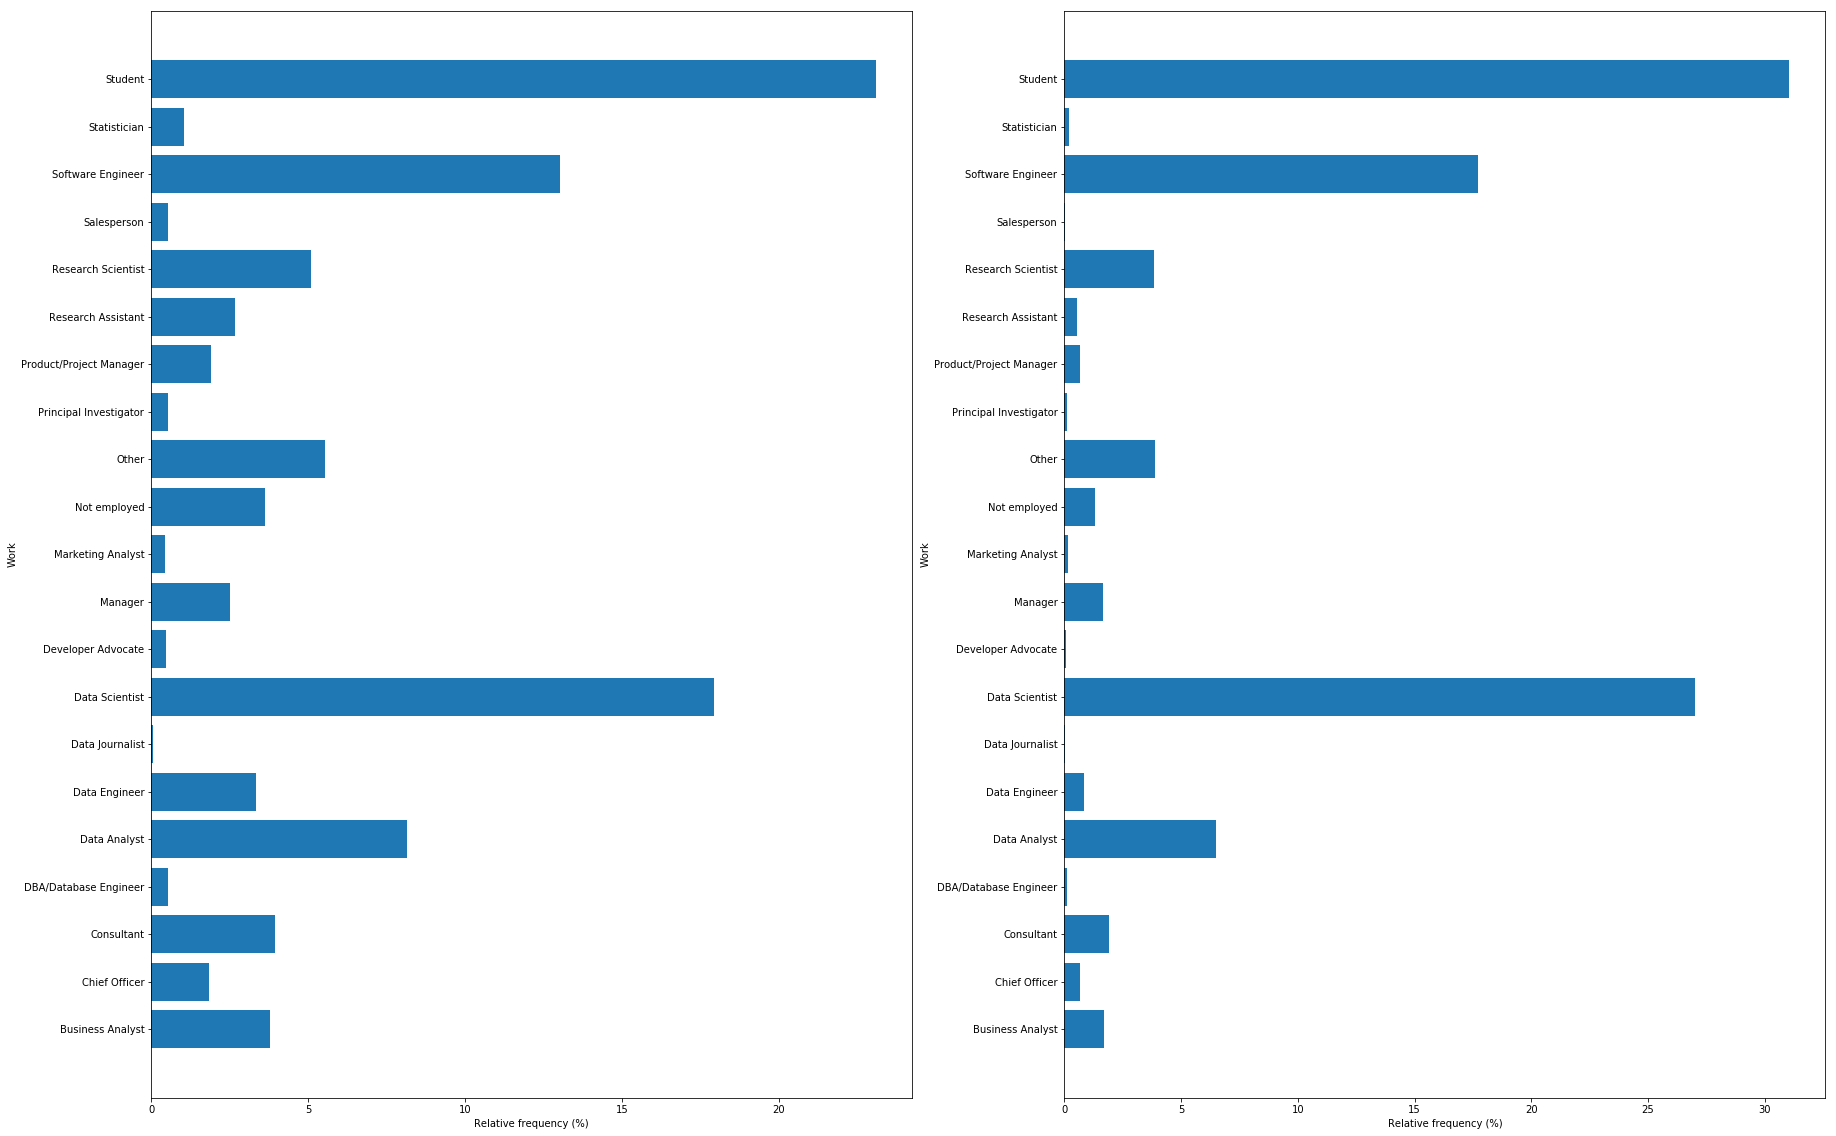

In [14]:
plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
graph_h('Work',Y_ts)

plt.subplot(1,2,2)
graph_h('Work', RF.predict(X_ts))

plt.show()

Alll the data was converted to binary data, with a total of 48 parameters. These were normalized and the RandomForest could determinate globally the distribution of the profession data of the Kagglers

Cluster

In [23]:
from sklearn.cluster import KMeans

In [33]:
KM = KMeans(n_clusters=5)
ii = KM.fit_predict(X)

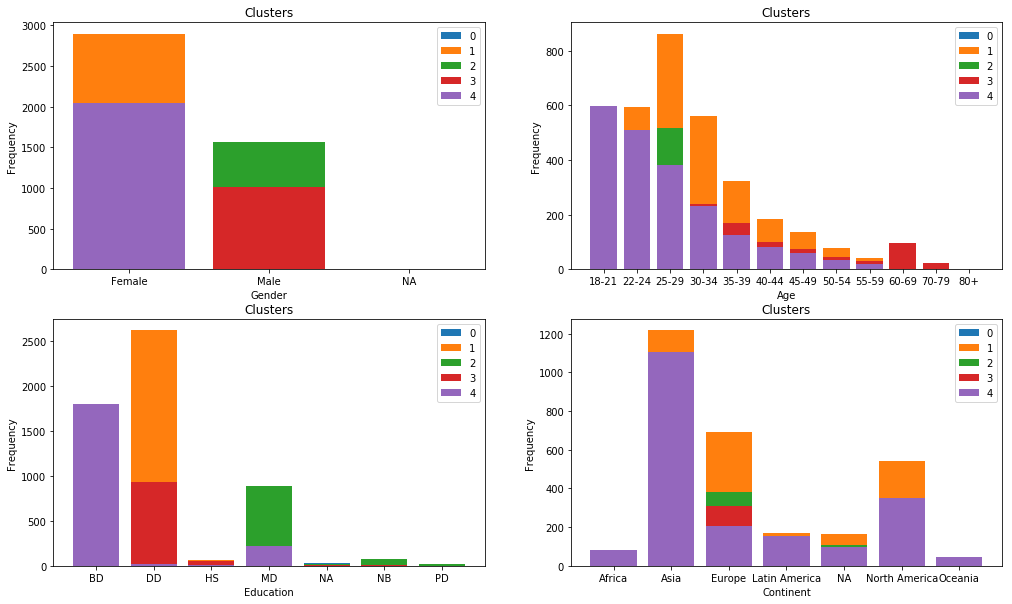

In [34]:
plt.figure(figsize=(17,10))

plt.subplot(221)
group_graph(ii,gender)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Clusters')

plt.subplot(222)
group_graph(ii,age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Clusters')

plt.subplot(223)
group_graph(ii,education)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Clusters')

plt.subplot(224)
group_graph(ii,country)
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Clusters')

plt.show()

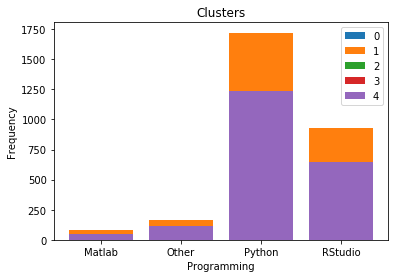

In [35]:
group_graph(ii,coding)
plt.xlabel('Programming')
plt.ylabel('Frequency')
plt.title('Clusters')

plt.show()